#                 ML Evalution


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
train=pd.read_csv(r"C:\Users\Nishant kmr\Downloads\prep0122056_train.csv")
test=pd.read_csv(r"C:\Users\Nishant kmr\Downloads\prep0122056_test.csv")

In [3]:
train

,Unnamed: 0,Status,Life expectancy,Adult Mortality,BMI,HIV/AIDS,Diphtheria,Polio,GDP,Income composition of resources,Schooling
0,2259,Developing,65.0,242.0,19.5,0.7,84.0,84.0,773.869871,0.415,6.4
1,2366,Developing,68.3,188.0,46.4,0.1,9.0,94.0,1272.448250,0.492,9.3
2,1200,Developing,62.9,222.0,11.8,0.3,59.0,58.0,447.138966,0.494,8.3
3,62,Developing,45.7,44.0,15.8,2.1,38.0,41.0,526.168743,0.391,5.1
4,2150,Developing,65.0,37.0,54.0,0.2,96.0,97.0,1771.586620,0.709,12.1
...,...,...,...,...,...,...,...,...,...,...,...
1759,1362,Developing,63.4,249.0,22.0,2.8,89.0,83.0,1349.971440,0.550,11.1
1760,2400,Developing,55.3,473.0,45.7,23.5,79.0,77.0,5786.599720,0.616,12.9
1761,1538,Developed,82.0,63.0,61.3,0.1,99.0,99.0,1199.822300,0.896,13.9
1762,1065,Developing,79.0,19.0,45.9,0.4,95.0,96.0,2794.221890,0.589,10.4


In [4]:
train=train.drop('Unnamed: 0',axis=1)

In [5]:
train

,Status,Life expectancy,Adult Mortality,BMI,HIV/AIDS,Diphtheria,Polio,GDP,Income composition of resources,Schooling
0,Developing,65.0,242.0,19.5,0.7,84.0,84.0,773.869871,0.415,6.4
1,Developing,68.3,188.0,46.4,0.1,9.0,94.0,1272.448250,0.492,9.3
2,Developing,62.9,222.0,11.8,0.3,59.0,58.0,447.138966,0.494,8.3
3,Developing,45.7,44.0,15.8,2.1,38.0,41.0,526.168743,0.391,5.1
4,Developing,65.0,37.0,54.0,0.2,96.0,97.0,1771.586620,0.709,12.1
...,...,...,...,...,...,...,...,...,...,...
1759,Developing,63.4,249.0,22.0,2.8,89.0,83.0,1349.971440,0.550,11.1
1760,Developing,55.3,473.0,45.7,23.5,79.0,77.0,5786.599720,0.616,12.9
1761,Developed,82.0,63.0,61.3,0.1,99.0,99.0,1199.822300,0.896,13.9
1762,Developing,79.0,19.0,45.9,0.4,95.0,96.0,2794.221890,0.589,10.4


In [6]:
test=test.drop('Unnamed: 0',axis=1)

In [7]:
test

,Status,Life expectancy,Adult Mortality,BMI,HIV/AIDS,Diphtheria,Polio,GDP,Income composition of resources,Schooling
0,Developing,72.7,134.0,48.1,0.1,94.0,96.0,93.166157,0.657,10.8
1,Developing,65.2,182.0,32.5,0.3,85.0,82.0,236.314438,0.553,10.1
2,Developed,81.1,62.0,56.5,0.1,98.0,98.0,55746.842380,0.897,15.7
3,Developing,81.3,86.0,6.1,0.1,99.0,99.0,473.342790,0.879,16.0
4,Developing,74.5,145.0,48.9,0.4,91.0,91.0,492.492378,0.718,12.6
...,...,...,...,...,...,...,...,...,...,...
436,Developing,55.0,388.0,2.4,5.2,42.0,54.0,1136.829645,0.477,9.1
437,Developing,77.4,79.0,37.2,0.1,97.0,99.0,4717.273000,0.846,14.1
438,Developing,76.1,138.0,58.0,0.1,93.0,93.0,17454.843420,0.838,16.4
439,Developing,65.3,27.0,75.2,0.1,91.0,95.0,1493.165100,0.584,11.9


In [8]:
train.shape

(1764, 10)

In [9]:
test.shape

(441, 10)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1764 entries, 0 to 1763
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Status                           1764 non-null   object 
 1   Life expectancy                  1764 non-null   float64
 2   Adult Mortality                  1764 non-null   float64
 3   BMI                              1764 non-null   float64
 4   HIV/AIDS                         1764 non-null   float64
 5   Diphtheria                       1764 non-null   float64
 6   Polio                            1764 non-null   float64
 7   GDP                              1764 non-null   float64
 8   Income composition of resources  1764 non-null   float64
 9   Schooling                        1764 non-null   float64
dtypes: float64(9), object(1)
memory usage: 137.9+ KB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Status                           441 non-null    object 
 1   Life expectancy                  441 non-null    float64
 2   Adult Mortality                  441 non-null    float64
 3   BMI                              441 non-null    float64
 4   HIV/AIDS                         441 non-null    float64
 5   Diphtheria                       441 non-null    float64
 6   Polio                            441 non-null    float64
 7   GDP                              441 non-null    float64
 8   Income composition of resources  441 non-null    float64
 9   Schooling                        441 non-null    float64
dtypes: float64(9), object(1)
memory usage: 34.6+ KB


In [12]:
train.describe()

,Life expectancy,Adult Mortality,BMI,HIV/AIDS,Diphtheria,Polio,GDP,Income composition of resources,Schooling
count,1764.00000,1764.000000,1764.000000,1764.000000,1764.000000,1764.000000,1764.000000,1764.000000,1764.000000
mean,69.41746,159.924603,38.375340,1.886224,82.567460,82.795351,7207.194047,0.634239,12.122846
std,9.60953,125.461284,19.787323,5.366290,23.545746,22.799070,13458.634503,0.208169,3.275515
min,36.30000,1.000000,1.800000,0.100000,2.000000,3.000000,1.681350,0.000000,0.000000
25%,63.50000,71.000000,19.200000,0.100000,79.000000,78.000000,464.135473,0.496500,10.200000
50%,72.30000,137.000000,43.900000,0.100000,93.000000,93.000000,1857.314509,0.686000,12.400000
75%,75.80000,221.000000,56.100000,0.800000,97.000000,97.000000,6231.377031,0.787000,14.400000
max,89.00000,717.000000,77.100000,50.600000,99.000000,99.000000,115761.577000,0.945000,20.700000


In [13]:
 train.duplicated().sum()

0

In [14]:
train.corr()

,Life expectancy,Adult Mortality,BMI,HIV/AIDS,Diphtheria,Polio,GDP,Income composition of resources,Schooling
Life expectancy,1.000000,-0.675750,0.581611,-0.576491,0.463351,0.447209,0.450463,0.744854,0.759503
Adult Mortality,-0.675750,1.000000,-0.387334,0.524511,-0.240759,-0.247111,-0.286887,-0.462980,-0.444943
BMI,0.581611,-0.387334,1.000000,-0.254755,0.286106,0.296669,0.304876,0.540867,0.585543
HIV/AIDS,-0.576491,0.524511,-0.254755,1.000000,-0.152090,-0.138130,-0.139993,-0.277943,-0.244516
Diphtheria,0.463351,-0.240759,0.286106,-0.152090,1.000000,0.678371,0.207198,0.423711,0.444370
Polio,0.447209,-0.247111,0.296669,-0.138130,0.678371,1.000000,0.217215,0.399360,0.433286
GDP,0.450463,-0.286887,0.304876,-0.139993,0.207198,0.217215,1.000000,0.456346,0.446380
Income composition of resources,0.744854,-0.462980,0.540867,-0.277943,0.423711,0.399360,0.456346,1.000000,0.802374
Schooling,0.759503,-0.444943,0.585543,-0.244516,0.444370,0.433286,0.446380,0.802374,1.000000


In [15]:
train=train.rename(columns = {'Life expectancy':'Life_expectancy'})

In [16]:
test=test.rename(columns = {'Life expectancy':'Life_expectancy'})

In [17]:
train.corr()['Life_expectancy']
#finding the correlation

Life_expectancy                    1.000000
Adult Mortality                   -0.675750
BMI                                0.581611
HIV/AIDS                          -0.576491
Diphtheria                         0.463351
Polio                              0.447209
GDP                                0.450463
Income composition of resources    0.744854
Schooling                          0.759503
Name: Life_expectancy, dtype: float64

# EDA
#knowing more about the data by seeing spread of data ,outliers etc

C:\Users\Nishant kmr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Status', ylabel='count'>

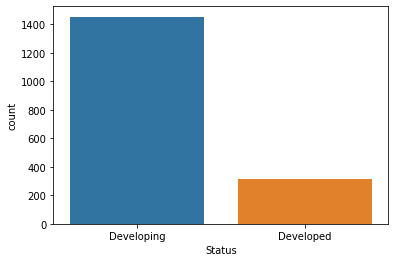

In [18]:
sns.countplot(train['Status'])

In [19]:
train['Status'].value_counts()

Developing    1453
Developed      311
Name: Status, dtype: int64

In [20]:
test['Status'].value_counts()

Developing    363
Developed      78
Name: Status, dtype: int64

In [21]:
#find that test and train data is equally distributed or not()
(78/(311+78))*100

20.051413881748072

In [32]:
#rounding the 'Life_expectancy' so that plot it. to visulize the data clearly
def myround(x, base=5):
    return base * round(x/base)

In [33]:
train['life_exp']=train['Life_expectancy'].apply(lambda x : myround(x,1))

C:\Users\Nishant kmr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Life_expectancy', ylabel='count'>

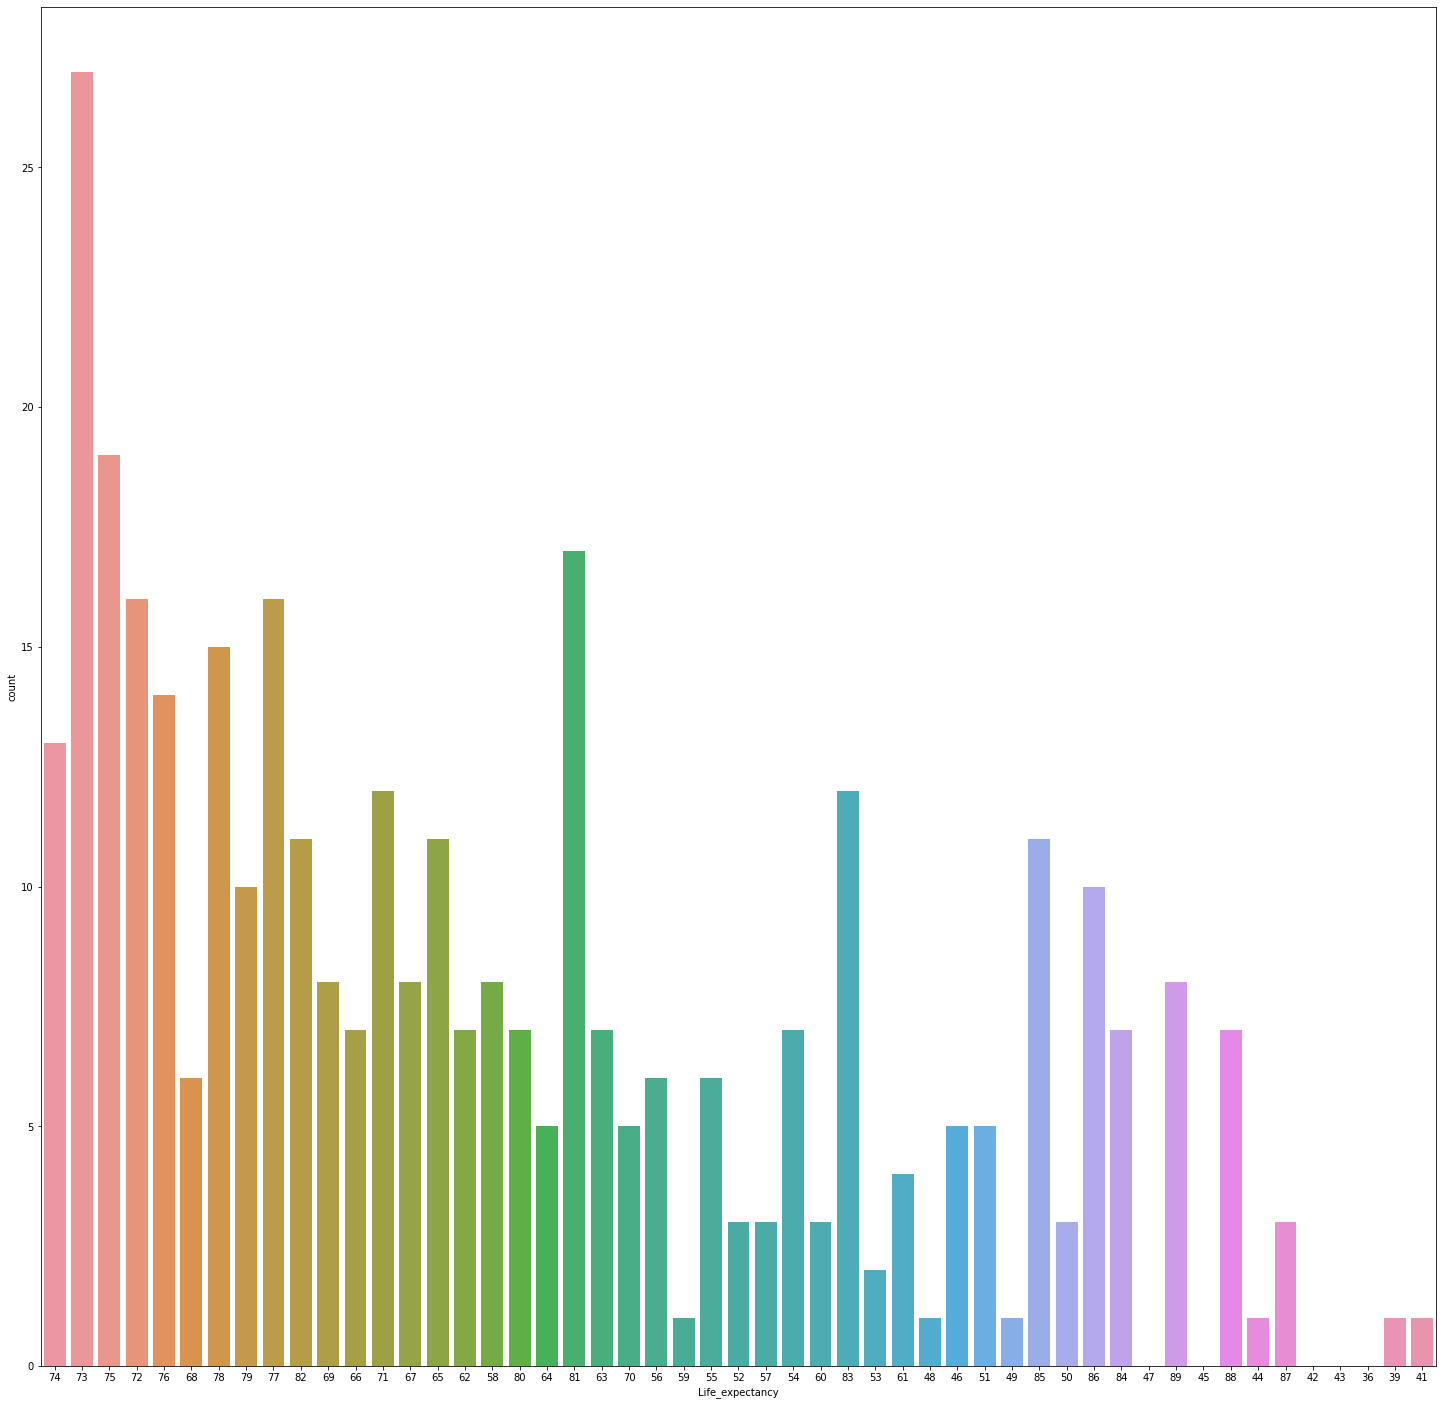

In [34]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(25,25))

sns.countplot(train.Life_expectancy,order=train['life_exp'].value_counts().index)


array([[<AxesSubplot:title={'center':'Life_expectancy'}>,
        <AxesSubplot:title={'center':'Adult Mortality'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'HIV/AIDS'}>,
        <AxesSubplot:title={'center':'Diphtheria'}>,
        <AxesSubplot:title={'center':'Polio'}>],
       [<AxesSubplot:title={'center':'GDP'}>,
        <AxesSubplot:title={'center':'Income composition of resources'}>,
        <AxesSubplot:title={'center':'Schooling'}>],
       [<AxesSubplot:title={'center':'life_exp'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

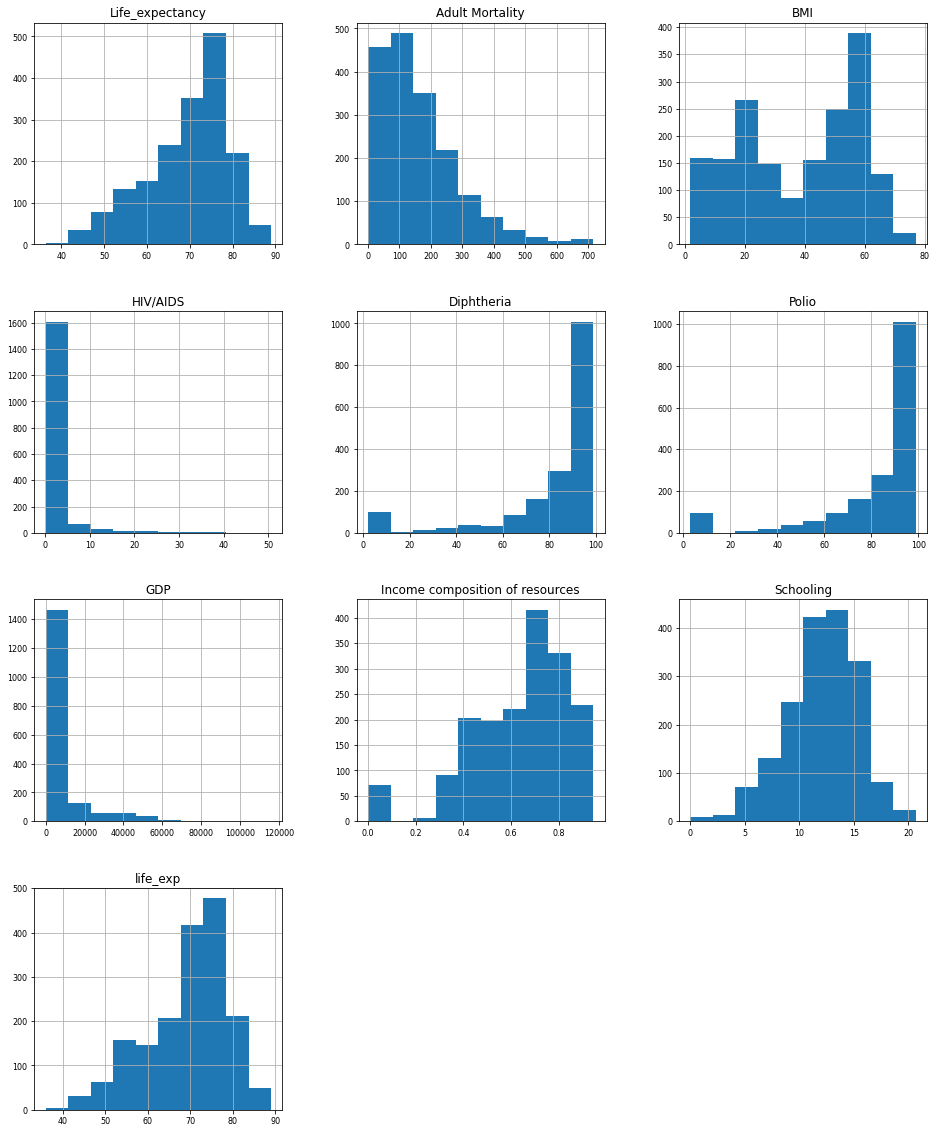

In [35]:
#histogram 
train.select_dtypes(include = ['float64', 'int64']).hist(figsize=(16, 20), bins=10, xlabelsize=8, ylabelsize=8)

In [ ]:
#knowing the probability of data lying where

C:\Users\Nishant kmr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Life_expectancy', ylabel='Density'>

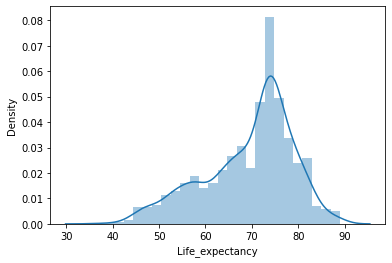

In [36]:
sns.distplot(train['Life_expectancy'])

C:\Users\Nishant kmr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Adult Mortality', ylabel='Density'>

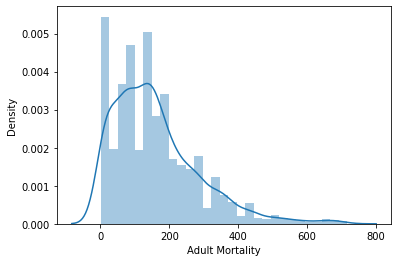

In [37]:
sns.distplot(train['Adult Mortality'])

C:\Users\Nishant kmr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BMI', ylabel='Density'>

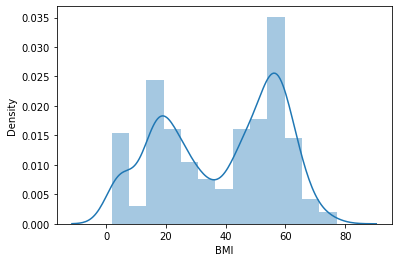

In [38]:
sns.distplot(train['BMI'])

C:\Users\Nishant kmr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Diphtheria', ylabel='Density'>

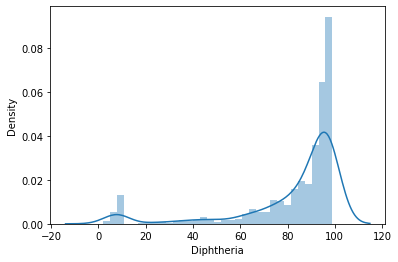

In [39]:
sns.distplot(train['Diphtheria'])

C:\Users\Nishant kmr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Schooling', ylabel='Density'>

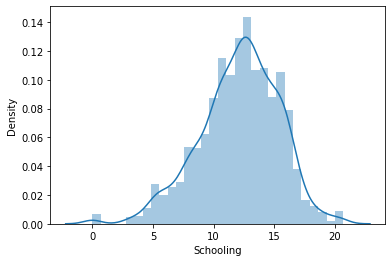

In [40]:
sns.distplot(train['Schooling'])

C:\Users\Nishant kmr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Polio', ylabel='Density'>

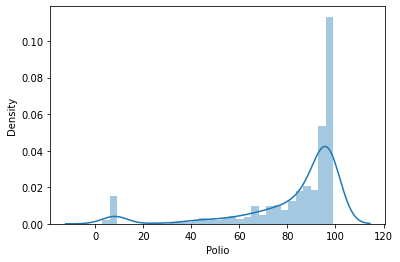

In [41]:
sns.distplot(train['Polio'])

C:\Users\Nishant kmr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GDP', ylabel='Density'>

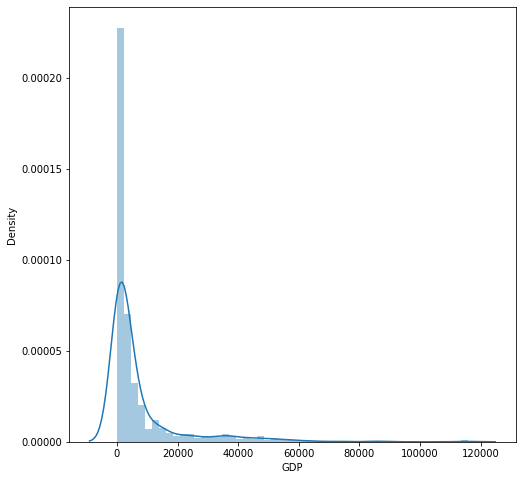

In [42]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(8,8))

sns.distplot(train['GDP'])

In [ ]:
#boxplot for they provide a visual summary of the data enabling researchers to quickly identify mean values,median and percentile thing

C:\Users\Nishant kmr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Life_expectancy'>

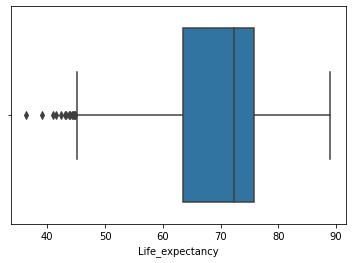

In [43]:
sns.boxplot(train['Life_expectancy'],)

C:\Users\Nishant kmr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Adult Mortality'>

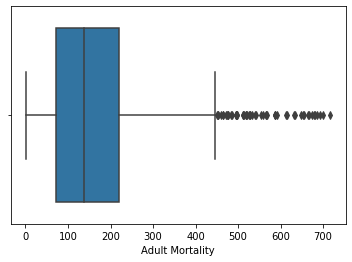

In [44]:
sns.boxplot(train['Adult Mortality'])

C:\Users\Nishant kmr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BMI'>

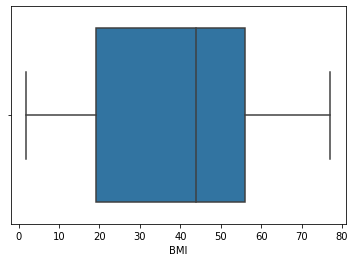

In [45]:
sns.boxplot(train['BMI'])

C:\Users\Nishant kmr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Polio'>

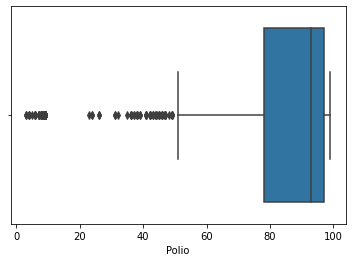

In [46]:
sns.boxplot(train['Polio'])

C:\Users\Nishant kmr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Diphtheria'>

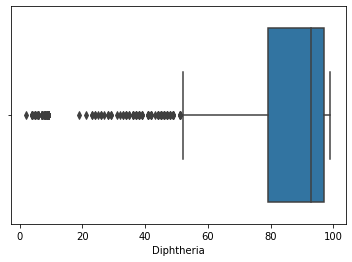

In [47]:
sns.boxplot(train['Diphtheria'])

C:\Users\Nishant kmr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Schooling'>

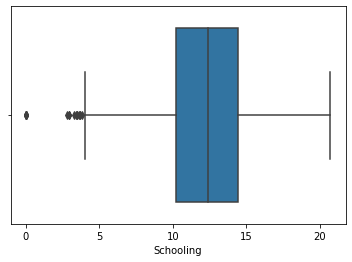

In [48]:
sns.boxplot(train['Schooling'])

C:\Users\Nishant kmr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income composition of resources'>

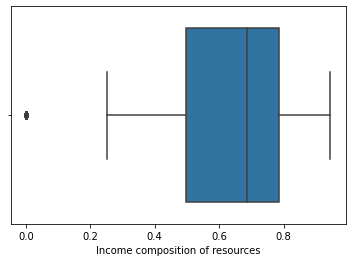

In [49]:
sns.boxplot(train['Income composition of resources'])

<AxesSubplot:>

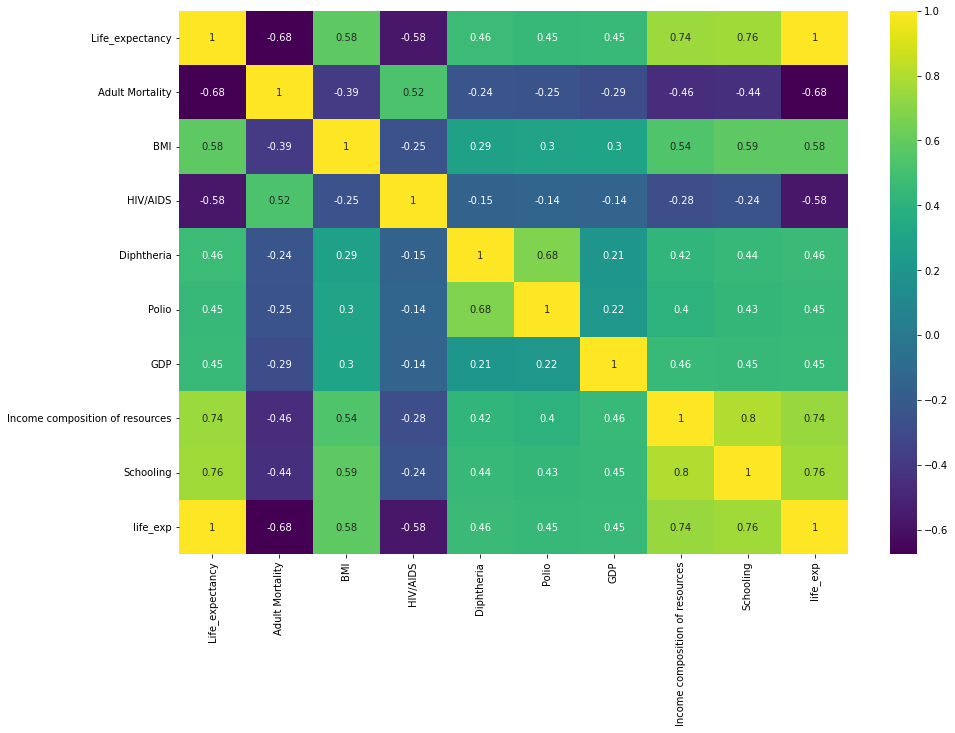

In [50]:
_,ax=plt.subplots(figsize=(15,10))
colormap=sns.color_palette("viridis", as_cmap=True)
sns.heatmap(train.corr(),annot=True,cmap=colormap)

<AxesSubplot:>

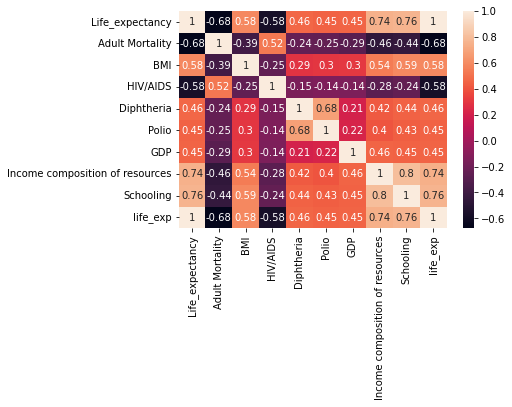

In [51]:
sns.heatmap(train.corr(),annot=True)


<AxesSubplot:>

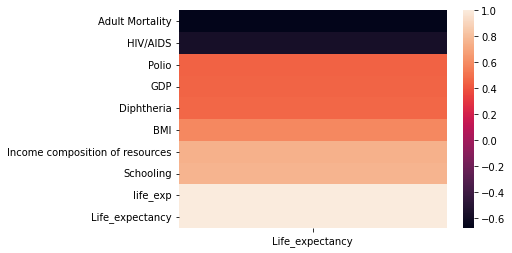

In [52]:
sns.heatmap(train.corr()[['Life_expectancy']].sort_values('Life_expectancy'))

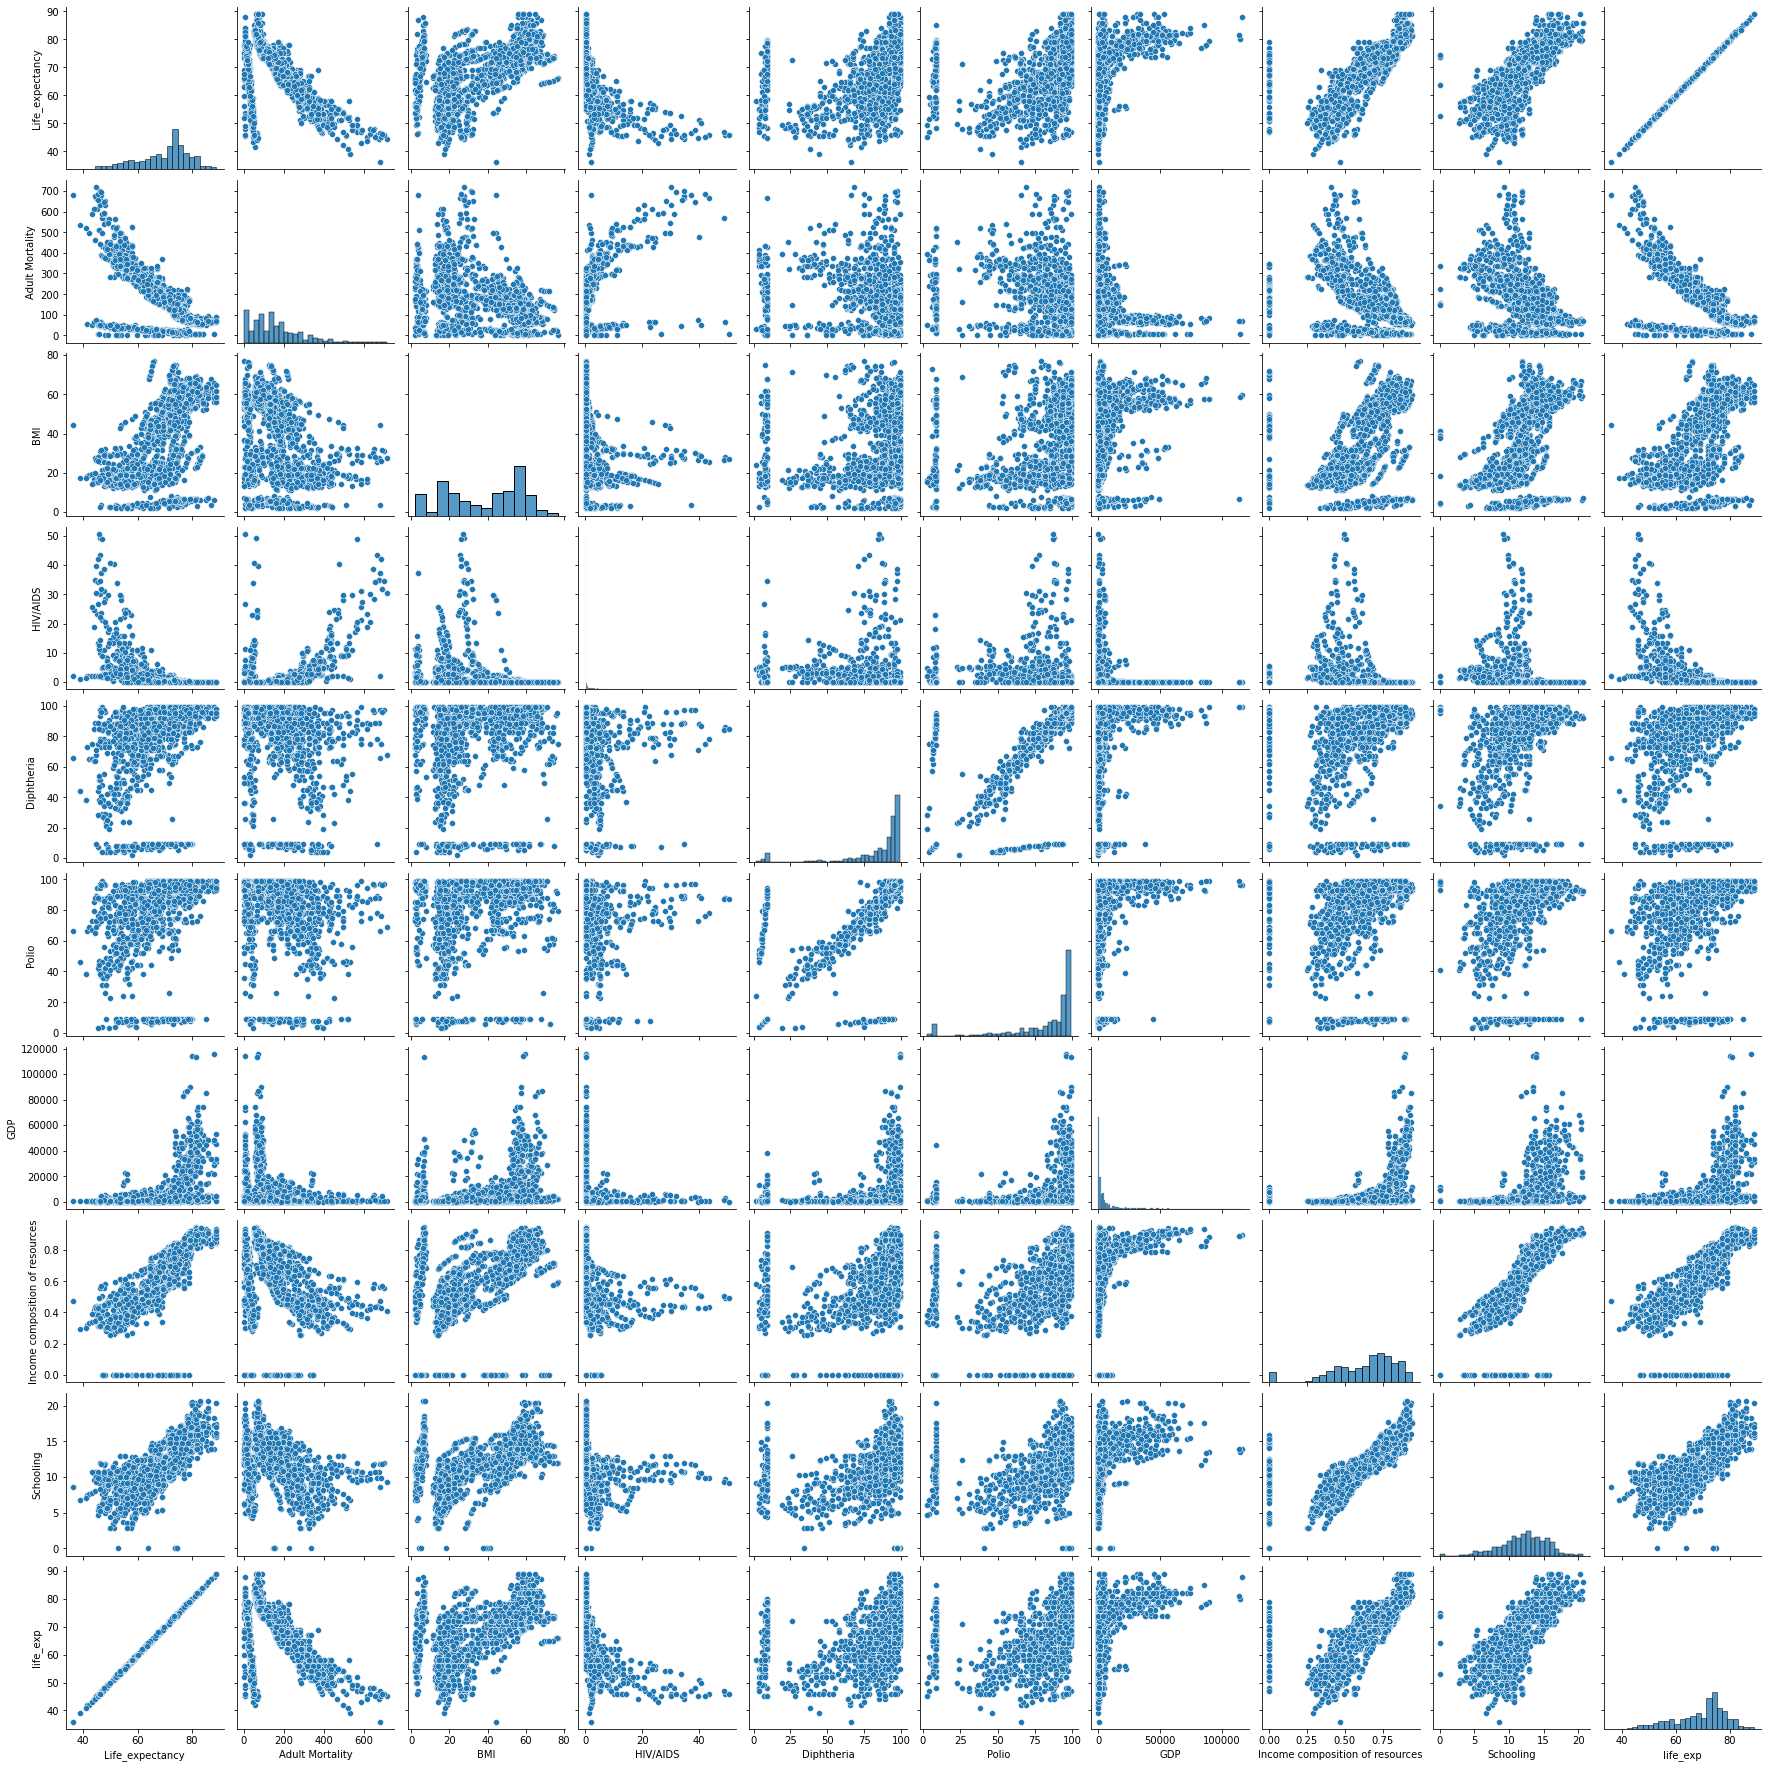

In [53]:
sns.pairplot(train)

## EDA

1. How many independent variables/features are there in the data set? 
ans :- Feature are[Status,Adult Mortality,BMI,HIV/AIDS,Diphtheria,Polio,GDP,Income composition of resources,Schooling]
    
2. How many categorical features are there? 
ans :- numerical features are [Status]
    
3. How many numerical features are there?
ans :- Feature are[Life_expectancy,Adult Mortality,BMI,HIV/AIDS,Diphtheria,Polio,GDP,Income composition of resources,Schooling]
    
4. Which is the third most important feature based on correlation for regression? 
ans :- [Income composition of resources ,Schooling ,BMI]
    
5. Which is the least important feature based on correlation for regression?
Ans:- [HIV/AIDS,Polio,Adult mortality]

In [54]:
#q3 How many numerical features are there?
numerical = train._get_numeric_data().columns
numerical

Index(['Life_expectancy', 'Adult Mortality', 'BMI', 'HIV/AIDS', 'Diphtheria',
       'Polio', 'GDP', 'Income composition of resources', 'Schooling',
       'life_exp'],
      dtype='object')

In [ ]:
#dealig with categorical features by pandas function get_dummies

In [55]:
train=pd.get_dummies(train,columns=['Status'])

In [56]:
train.drop('Status_Developing',axis=1,inplace=True)

In [57]:
train=train.rename(columns = {'Status_Developed':'Status'})

In [59]:
train=train.drop('life_exp',axis=1)

In [60]:
train['Status'].value_counts()

0    1453
1     311
Name: Status, dtype: int64

<AxesSubplot:>

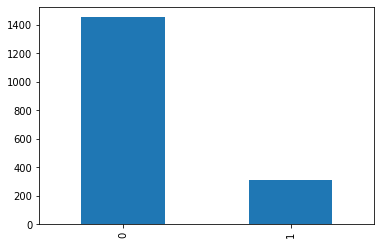

In [61]:
train['Status'].value_counts().plot(kind='bar')

In [62]:
test=pd.get_dummies(test,columns=['Status'])

In [63]:
test.drop('Status_Developing',axis=1,inplace=True)

In [64]:
test=test.rename(columns = {'Status_Developed':'Status'})

In [65]:
test

,Life_expectancy,Adult Mortality,BMI,HIV/AIDS,Diphtheria,Polio,GDP,Income composition of resources,Schooling,Status
0,72.7,134.0,48.1,0.1,94.0,96.0,93.166157,0.657,10.8,0
1,65.2,182.0,32.5,0.3,85.0,82.0,236.314438,0.553,10.1,0
2,81.1,62.0,56.5,0.1,98.0,98.0,55746.842380,0.897,15.7,1
3,81.3,86.0,6.1,0.1,99.0,99.0,473.342790,0.879,16.0,0
4,74.5,145.0,48.9,0.4,91.0,91.0,492.492378,0.718,12.6,0
...,...,...,...,...,...,...,...,...,...,...
436,55.0,388.0,2.4,5.2,42.0,54.0,1136.829645,0.477,9.1,0
437,77.4,79.0,37.2,0.1,97.0,99.0,4717.273000,0.846,14.1,0
438,76.1,138.0,58.0,0.1,93.0,93.0,17454.843420,0.838,16.4,0
439,65.3,27.0,75.2,0.1,91.0,95.0,1493.165100,0.584,11.9,0


In [66]:
test['Status'].value_counts()

0    363
1     78
Name: Status, dtype: int64

<AxesSubplot:>

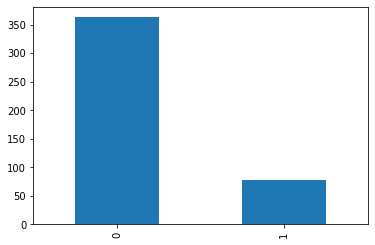

In [67]:
test['Status'].value_counts().plot(kind='bar')

In [68]:
train.sample(10)

,Life_expectancy,Adult Mortality,BMI,HIV/AIDS,Diphtheria,Polio,GDP,Income composition of resources,Schooling,Status
464,78.3,95.0,59.4,0.1,95.0,96.0,3743.956930,0.878,18.6,1
1447,88.0,66.0,58.2,0.1,95.0,97.0,31959.262150,0.851,15.8,1
400,67.2,19.0,19.0,0.1,72.0,79.0,126.928834,0.629,11.1,0
1421,74.5,98.0,62.5,0.1,81.0,75.0,712.775759,0.740,13.1,0
354,82.0,69.0,24.4,0.1,98.0,95.0,37217.648730,0.870,14.9,1
1745,73.4,157.0,45.9,0.5,97.0,97.0,1815.489496,0.603,11.3,0
973,81.1,74.0,22.2,0.1,85.0,98.0,38532.488000,0.852,14.5,1
144,74.2,151.0,4.1,0.1,99.0,99.0,9739.825560,0.000,0.0,0
1093,73.2,137.0,29.8,0.1,95.0,95.0,4955.477743,0.731,12.7,0
420,79.8,73.0,53.4,0.1,99.0,99.0,26969.244570,0.877,15.9,1


In [69]:
train.sample(10)

,Life_expectancy,Adult Mortality,BMI,HIV/AIDS,Diphtheria,Polio,GDP,Income composition of resources,Schooling,Status
1611,56.3,41.0,15.6,8.2,71.0,69.0,449.692818,0.453,10.6,0
843,66.3,215.0,48.6,0.1,99.0,99.0,6432.668768,0.688,10.8,0
981,68.9,167.0,17.4,0.2,9.0,9.0,681.792587,0.538,12.3,0
587,81.7,58.0,57.7,0.1,98.0,98.0,59593.287110,0.901,16.0,1
804,72.1,186.0,28.1,0.1,99.0,99.0,8331.261997,0.712,12.1,0
669,61.0,255.0,2.6,0.1,81.0,81.0,795.975190,0.461,10.2,0
781,73.9,127.0,52.8,0.1,94.0,88.0,3725.632210,0.742,13.3,0
902,77.0,111.0,61.8,0.1,95.0,95.0,14166.499800,0.780,15.5,0
1103,79.7,71.0,29.9,0.1,95.0,95.0,2745.271360,0.820,12.7,1
940,75.6,138.0,44.4,0.1,98.0,99.0,12126.876140,0.783,14.1,0


## linear regression

In [70]:
from sklearn import linear_model
from sklearn.metrics import r2_score


In [71]:
train

,Life_expectancy,Adult Mortality,BMI,HIV/AIDS,Diphtheria,Polio,GDP,Income composition of resources,Schooling,Status
0,65.0,242.0,19.5,0.7,84.0,84.0,773.869871,0.415,6.4,0
1,68.3,188.0,46.4,0.1,9.0,94.0,1272.448250,0.492,9.3,0
2,62.9,222.0,11.8,0.3,59.0,58.0,447.138966,0.494,8.3,0
3,45.7,44.0,15.8,2.1,38.0,41.0,526.168743,0.391,5.1,0
4,65.0,37.0,54.0,0.2,96.0,97.0,1771.586620,0.709,12.1,0
...,...,...,...,...,...,...,...,...,...,...
1759,63.4,249.0,22.0,2.8,89.0,83.0,1349.971440,0.550,11.1,0
1760,55.3,473.0,45.7,23.5,79.0,77.0,5786.599720,0.616,12.9,0
1761,82.0,63.0,61.3,0.1,99.0,99.0,1199.822300,0.896,13.9,1
1762,79.0,19.0,45.9,0.4,95.0,96.0,2794.221890,0.589,10.4,0


In [ ]:
#dividing data into xtrain,ytrain,xtest,ytest for model building

In [72]:
xtrain=train.drop('Life_expectancy',axis=1).values

In [73]:
ytrain=train['Life_expectancy'].values

In [74]:
xtest=test.drop('Life_expectancy',axis=1).values

In [75]:
ytest=test['Life_expectancy']

In [ ]:
#Doing standard scaling to scale the data to get more accurate result

In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
scaler=StandardScaler()

In [80]:
scaler.fit(xtrain)

StandardScaler()

In [81]:
xtrain_scal=scaler.transform(xtrain)
xtest_scal=scaler.transform(xtest)

In [219]:
pd.DataFrame(xtrain)

,0,1,2,3,4,5,6,7,8
0,242.0,19.5,0.7,84.0,84.0,773.869871,0.415,6.4,0.0
1,188.0,46.4,0.1,9.0,94.0,1272.448250,0.492,9.3,0.0
2,222.0,11.8,0.3,59.0,58.0,447.138966,0.494,8.3,0.0
3,44.0,15.8,2.1,38.0,41.0,526.168743,0.391,5.1,0.0
4,37.0,54.0,0.2,96.0,97.0,1771.586620,0.709,12.1,0.0
...,...,...,...,...,...,...,...,...,...
1759,249.0,22.0,2.8,89.0,83.0,1349.971440,0.550,11.1,0.0
1760,473.0,45.7,23.5,79.0,77.0,5786.599720,0.616,12.9,0.0
1761,63.0,61.3,0.1,99.0,99.0,1199.822300,0.896,13.9,1.0
1762,19.0,45.9,0.4,95.0,96.0,2794.221890,0.589,10.4,0.0


In [83]:
pd.DataFrame(xtrain_scal)

,0,1,2,3,4,5,6,7,8
0,0.654375,-0.954181,-0.221114,0.060858,0.052853,-0.478143,-1.053480,-1.747654,-0.462644
1,0.223841,0.405661,-0.332955,-3.125334,0.491591,-0.441087,-0.683482,-0.862046,-0.462644
2,0.494918,-1.343430,-0.295674,-1.001206,-1.087868,-0.502426,-0.673872,-1.167428,-0.462644
3,-0.924249,-1.141223,0.039848,-1.893340,-1.833724,-0.496553,-1.168803,-2.144651,-0.462644
4,-0.980059,0.789854,-0.314314,0.570649,0.623213,-0.403990,0.359237,-0.006977,-0.462644
...,...,...,...,...,...,...,...,...,...
1759,0.710184,-0.827802,0.170329,0.273271,0.008979,-0.435325,-0.404783,-0.312359,-0.462644
1760,2.496102,0.370274,4.028836,-0.151555,-0.254265,-0.105583,-0.087642,0.237329,-0.462644
1761,-0.772765,1.158881,-0.332955,0.698096,0.710961,-0.446485,1.257802,0.542711,2.161487
1762,-1.123570,0.380385,-0.277034,0.528166,0.579339,-0.327985,-0.217382,-0.526126,-0.462644


In [ ]:
#building model with scaled data

# linear regression

In [84]:
reg=linear_model.LinearRegression()


In [85]:
 reg.fit(xtrain_scal,ytrain)

LinearRegression()

In [86]:
pred=reg.predict(xtest_scal)

In [87]:
# Q.1
# mean_squared_error
from sklearn.metrics import mean_squared_error
mse=mean_squared_error

In [88]:
mse(ytest,pred)

14.131518466980436

In [89]:
# Q.2
#r2 score from sklearn
r2_score(ytest,pred)

0.854583276993737

In [90]:
# Q.3
# mean_absolute_error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest,pred)

2.7939023209938174

In [ ]:
# Q.4
#determining cost function on test data 

In [91]:
cost = np.sum((pred - ytest) ** 2)

In [92]:
cost

6231.999643938372

In [ ]:
#determining cost function on train data 

In [93]:
pr=reg.predict(xtrain_scal)

In [94]:
cost1 = np.sum((pr - ytrain) ** 2)

In [95]:
cost1

28367.544017278342

In [ ]:
#picking top 5 feature for next linear regression model

In [96]:
train.corr()['Life_expectancy']

Life_expectancy                    1.000000
Adult Mortality                   -0.675750
BMI                                0.581611
HIV/AIDS                          -0.576491
Diphtheria                         0.463351
Polio                              0.447209
GDP                                0.450463
Income composition of resources    0.744854
Schooling                          0.759503
Status                             0.482319
Name: Life_expectancy, dtype: float64

In [97]:
xtrain_top=train.drop(['Life_expectancy','Adult Mortality','HIV/AIDS','GDP','Polio'],axis=1).values

In [98]:
xtest_top=test.drop(['Life_expectancy','Adult Mortality','HIV/AIDS','GDP','Polio'],axis=1).values

In [99]:
from sklearn.preprocessing import StandardScaler

In [100]:
scaler1=StandardScaler()

In [101]:
scaler1.fit(xtrain_top)

StandardScaler()

In [102]:
xtrain_scal1=scaler1.transform(xtrain_top)
xtest_scal1=scaler1.transform(xtest_top)

In [103]:
reg_top=linear_model.LinearRegression()
reg_top.fit(xtrain_scal1,ytrain)

LinearRegression()

In [104]:
pred_top=reg_top.predict(xtest_scal1)

In [105]:
# Q.5
# mean_squared_error
mse(ytest,pred_top)

30.088370657840326

In [106]:
# Q.6
# r2 score
r2_top=r2_score(ytest,pred_top)

In [107]:
r2_top

0.6903834310598439

## case1 :-building dataframe then getting prediction from model builded

In [108]:
new=pd.DataFrame([{'Adult Mortality':730, 'BMI':27,'HIV/AIDS':33, 'Diphtheria':70 ,'Polio':60 ,'GDP':450,'Income composition of resources':0.35,'Schooling':10,'Status':0 }])

In [109]:
new

,Adult Mortality,BMI,HIV/AIDS,Diphtheria,Polio,GDP,Income composition of resources,Schooling,Status
0,730,27,33,70,60,450,0.35,10,0


In [110]:
from sklearn.preprocessing import StandardScaler

In [111]:
case__1=scaler.transform(new)

C:\Users\Nishant kmr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [112]:
pred_new1=reg.predict(case__1)

In [113]:
#prediction of case 1

pred_new1

array([38.00083554])

## case2 :-building dataframe then getting prediction from model builded

In [114]:
new2=pd.DataFrame([{'Adult Mortality':100, 'BMI':20,'HIV/AIDS':1, 'Diphtheria':7 ,'Polio':6 ,'GDP':4500,'Income composition of resources':0.5,'Schooling':12,'Status':1}])

In [115]:
new2

,Adult Mortality,BMI,HIV/AIDS,Diphtheria,Polio,GDP,Income composition of resources,Schooling,Status
0,100,20,1,7,6,4500,0.5,12,1


In [116]:
case__2=scaler.transform(new2)

C:\Users\Nishant kmr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [117]:
pred_new2=reg.predict(case__2)

In [118]:
#prediction of case 2
pred_new2

array([65.65254734])

# Q2
## implementation logistic regression

In [119]:
train['Life_expectancy']=[1 if i>=65 else 0 for i in train['Life_expectancy']]

In [120]:
test['Life_expectancy']=[1 if i>=65 else 0 for i in test['Life_expectancy']]

In [121]:
test

,Life_expectancy,Adult Mortality,BMI,HIV/AIDS,Diphtheria,Polio,GDP,Income composition of resources,Schooling,Status
0,1,134.0,48.1,0.1,94.0,96.0,93.166157,0.657,10.8,0
1,1,182.0,32.5,0.3,85.0,82.0,236.314438,0.553,10.1,0
2,1,62.0,56.5,0.1,98.0,98.0,55746.842380,0.897,15.7,1
3,1,86.0,6.1,0.1,99.0,99.0,473.342790,0.879,16.0,0
4,1,145.0,48.9,0.4,91.0,91.0,492.492378,0.718,12.6,0
...,...,...,...,...,...,...,...,...,...,...
436,0,388.0,2.4,5.2,42.0,54.0,1136.829645,0.477,9.1,0
437,1,79.0,37.2,0.1,97.0,99.0,4717.273000,0.846,14.1,0
438,1,138.0,58.0,0.1,93.0,93.0,17454.843420,0.838,16.4,0
439,1,27.0,75.2,0.1,91.0,95.0,1493.165100,0.584,11.9,0


In [122]:
xtrain_new=train.drop('Life_expectancy',axis=1).values

In [123]:
ytrain_new=train['Life_expectancy'].values

In [124]:
xtest_new=test.drop('Life_expectancy',axis=1).values

In [125]:
ytest_new=test['Life_expectancy']

In [ ]:
#implemantation of logistic regression 

In [126]:
from sklearn.linear_model import LogisticRegression

In [127]:
log=LogisticRegression()

In [128]:
log.fit(xtrain_new,ytrain_new)

C:\Users\Nishant kmr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [129]:
y_pred_log = log.predict(xtest_new)

In [130]:
# Q.1
#accuracy
from sklearn.metrics import accuracy_score
print("Actual",accuracy_score(ytest_new,y_pred_log))

Actual 0.9523809523809523


In [131]:
log.coef_

array([[-1.49027464e-02,  1.41229806e-02, -1.09933625e+00,
         5.28162883e-03, -5.24102994e-03,  4.39472778e-04,
         1.00398763e-01,  3.52919508e-01,  2.13453429e-02]])

In [132]:
log.intercept_

array([-0.15231125])

In [133]:
from sklearn.metrics import confusion_matrix

In [134]:
# confusion_matrix to get true positive,true negative, false positive,false negative
con=confusion_matrix(ytest_new, y_pred_log)


In [135]:
con

array([[117,  14],
       [  7, 303]], dtype=int64)

In [136]:
#true positive
TP = con[0][0]
#false negative
FN = con[1][0]
#true negative
TN = con[1][1]
#false positive
FP = con[0][1]

In [220]:
# Q.2
FP,FN

(14, 7)

In [137]:
# Q.3
Precesion = TP/(TP+FP)
print(Precesion)
recall = TP/(TP+FN)
print(recall)

0.8931297709923665
0.9435483870967742


In [ ]:
# Q.4
#determining cost function on test data 

In [138]:
cost_new = np.sum((y_pred_log - ytest_new) ** 2)

In [139]:
cost_new

21

In [212]:
#determining cost function on train data 

In [213]:
p1=log.predict(xtrain_new)

In [141]:
cost_new1 = np.sum((p1 - ytrain_new) ** 2)

In [142]:
cost_new1

96

In [216]:
#getting the thresholds for model from range (0,10)
thresholds=[]
accuracy=[]
for i in np.linspace(0,1,11):
    accuracy.append(((log.predict_proba(xtest_new)[:,1]>i)==ytest_new).mean())
    thresholds.append(i)
print(accuracy)
print(thresholds)

[0.7029478458049887, 0.8798185941043084, 0.9024943310657596, 0.9297052154195011, 0.9433106575963719, 0.9523809523809523, 0.9478458049886621, 0.9319727891156463, 0.9229024943310657, 0.8798185941043084, 0.29705215419501135]
[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0]


In [217]:
# Q.5
#accuracy of threshold if probability is greater than 0.7
accuracy[7],thresholds[7]

(0.9319727891156463, 0.7000000000000001)

In [144]:
pd.DataFrame([{'thresholds':0.7,'accuracy':0.931972789}])

,thresholds,accuracy
0,0.7,0.931973


In [145]:
from sklearn.metrics import classification_report

In [146]:
print(classification_report(ytest_new,y_pred_log))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92       131
           1       0.96      0.98      0.97       310

    accuracy                           0.95       441
   macro avg       0.95      0.94      0.94       441
weighted avg       0.95      0.95      0.95       441



# Implementation Decision Tree

In [196]:
from sklearn.tree import DecisionTreeClassifier

In [197]:
dt = DecisionTreeClassifier()

In [198]:
dt.fit(xtrain_new,ytrain_new)

DecisionTreeClassifier()

In [199]:
prediction = dt.predict(xtest_new)

In [200]:
# Q.1
accuracy_score(ytest_new,prediction)

0.9659863945578231

In [152]:
cof=confusion_matrix(ytest_new,prediction)

In [153]:
cof

array([[123,   8],
       [  7, 303]], dtype=int64)

In [154]:
# Q .2
# false positive
fp=cof[0][1]
fp

8

In [155]:
f# false negative
fn=cof[1][0]
fn

7

In [221]:
# Q. 3
# precision
precision_dt=cof[0][0]/(cof[0][0]+fp)
precision_dt


0.968503937007874

In [157]:
#recall
recall_dt=cof[0][0]/(cof[0][0]+fn)
recall_dt

0.9461538461538461

In [158]:
print(classification_report(ytest_new,prediction))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       131
           1       0.97      0.98      0.98       310

    accuracy                           0.97       441
   macro avg       0.96      0.96      0.96       441
weighted avg       0.97      0.97      0.97       441



In [159]:
# to find gini impurity
def gini(temp):
    counts = temp['Life_expectancy'].value_counts().to_dict()
    impurity = 1
    for lbl in counts:
        prob_of_lbl = counts[lbl] / float(len(temp))
        impurity -= prob_of_lbl**2
    return impurity

In [160]:
# Q .4
# gini impurity on train data
gini(train)

0.40274049907188875

In [187]:
#finding entropy 
def entropy(column):
    counts = np.bincount(column)
    probabilities = counts / len(column)
    entropy = 0
    for prob in probabilities:
        if prob > 0:
            entropy += prob * math.log(prob, 2) 
    return -entropy

In [189]:
# Q.5
print(entropy(train['Adult Mortality']))
print(entropy(train['BMI']))
print(entropy(train['HIV/AIDS']))
print(entropy(train['Diphtheria']))
print(entropy(train['Polio']))
print(entropy(train['GDP']))
print(entropy(train['Schooling']))
print(entropy(train['Status']))


8.129582819303096
5.7268668721639235
1.7346167620982176
5.039676127983337
5.011518403247272
10.401168671496135
3.7046359576655763
0.6719241320988268


In [163]:
# Q,6
# gini impurity on test data
gini(test)

0.41762434376622903

In [190]:
# Q.7
print(entropy(test['Adult Mortality']))
print(entropy(test['BMI']))
print(entropy(test['HIV/AIDS']))
print(entropy(test['Diphtheria']))
print(entropy(test['Polio']))
print(entropy(test['GDP']))
print(entropy(test['Schooling']))
print(entropy(test['Status']))


7.682714550747903
5.654984311806768
1.6134981512369602
4.986259399790419
4.946414000978288
8.654227192486523
3.7558583025598433
0.6731833354357226


# Implementation of Random Forest

In [165]:
from sklearn.ensemble import RandomForestClassifier

In [166]:
rf=RandomForestClassifier()

In [167]:
rf.fit(xtrain_new,ytrain_new)

RandomForestClassifier()

In [201]:
prediction_rf = rf.predict(xtest_new)

In [202]:
# Q.1
#accuracy of model
accuracy_score(ytest_new,prediction_rf)

0.9909297052154195

In [203]:
con_rf=confusion_matrix(ytest_new,prediction_rf)

In [204]:
con_rf

array([[131,   0],
       [  4, 306]], dtype=int64)

In [205]:
# Q.2
tp=con_rf[0][0]
fp=con_rf[0][1]
fn=con_rf[1][0]
print('false positive,false negative:',fp,fn)

false positive,false negative: 0 4


In [206]:
# Q.3
#precision
precision_rf=tp/(tp+fp)

In [207]:
precision_rf

1.0

In [208]:
#recall
recall_rf=tp/(tp+fn)

In [209]:
recall_rf

0.9703703703703703

In [210]:
print(classification_report(ytest_new,prediction_rf))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       131
           1       1.00      0.99      0.99       310

    accuracy                           0.99       441
   macro avg       0.99      0.99      0.99       441
weighted avg       0.99      0.99      0.99       441

